In [ ]:
# import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the dataset we have for Soccer result EPL (2005 - 2020)
data_path = '/content/drive/MyDrive/EPL(2005-2020).csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR
0,0,12/09/2020,Fulham,Arsenal,0.0,3.0,6.00,4.33,1.53,A
1,1,12/09/2020,Crystal Palace,Southampton,1.0,0.0,3.10,3.25,2.37,H
2,2,12/09/2020,Liverpool,Leeds,4.0,3.0,1.28,6.00,9.50,H
3,3,12/09/2020,West Ham,Newcastle,0.0,2.0,2.15,3.40,3.40,A
4,4,13/09/2020,West Brom,Leicester,0.0,3.0,3.80,3.60,1.95,A


In [ ]:
df = df.drop(columns=['Unnamed: 0']) #Drop the column "Unnamed: 0"

In [ ]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR
0,12/09/2020,Fulham,Arsenal,0.0,3.0,6.00,4.33,1.53,A
1,12/09/2020,Crystal Palace,Southampton,1.0,0.0,3.10,3.25,2.37,H
2,12/09/2020,Liverpool,Leeds,4.0,3.0,1.28,6.00,9.50,H
3,12/09/2020,West Ham,Newcastle,0.0,2.0,2.15,3.40,3.40,A
4,13/09/2020,West Brom,Leicester,0.0,3.0,3.80,3.60,1.95,A


In [ ]:
df.shape # check for the shape of our Data frame

(6081, 9)

In [ ]:
df.info() # check the type of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6080 non-null   object 
 1   HomeTeam  6080 non-null   object 
 2   AwayTeam  6080 non-null   object 
 3   FTHG      6080 non-null   float64
 4   FTAG      6080 non-null   float64
 5   B365H     6080 non-null   float64
 6   B365D     6080 non-null   float64
 7   B365A     6080 non-null   float64
 8   FTR       6080 non-null   object 
dtypes: float64(5), object(4)
memory usage: 427.7+ KB


In [ ]:
df['Date']= pd.to_datetime(df['Date']) # change the date to date time format

In [ ]:
df.isnull().sum() # check for missing values

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
B365H       1
B365D       1
B365A       1
FTR         1
dtype: int64

In [ ]:
df = df.dropna() # since the missing values are small in proprtion we can simply drop them

In [ ]:
df.isnull().sum() # check for missing values again

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
B365H       1
B365D       1
B365A       1
FTR         1
dtype: int64

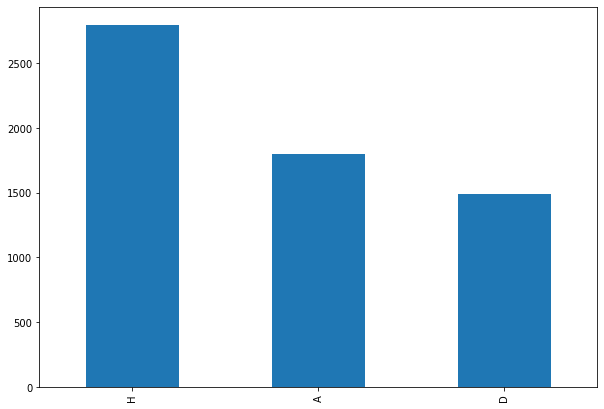

In [ ]:
# plot to check the balance of the data
plt.figure(figsize=(10, 7))
x = df['FTR'].value_counts()
df['FTR'].value_counts().plot(kind= 'bar', x = x)
plt.show()

In [ ]:
tot_match = df.shape[0]    # number of total matches 
home_wins = len(df[df.FTR == 'H']) # number of times the home team won
win_rate = (float(home_wins) / (tot_match)) * 100  # the win rate of home team

print(f"Total matches on the dataset are {tot_match}")
print(f"Total number of times home team wins is {home_wins}")
print(f"Home team have general win rate of {round(win_rate)}% on the data set")

Total matches on the dataset are 6081
Total number of times home team wins is 2797
Home team have general win rate of 46% on the data set


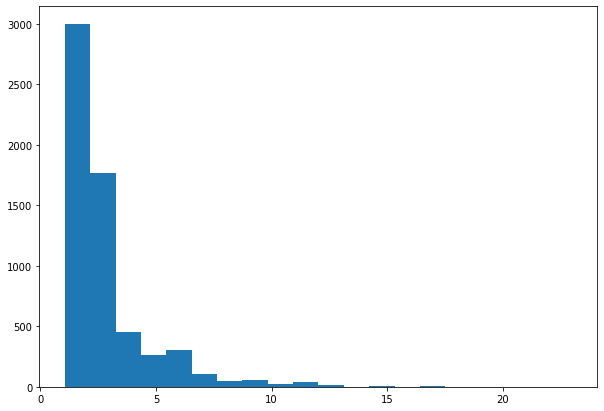

In [ ]:
# plots to check the distrbution of the data
plt.figure(figsize=(10, 7))
x = df['B365H']
plt.hist(x, bins=20)
plt.show()

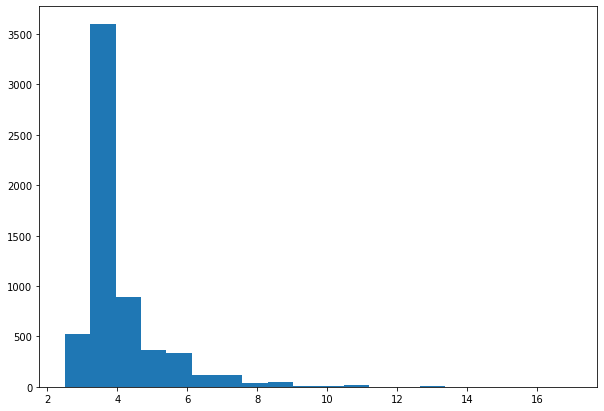

In [ ]:
plt.figure(figsize=(10, 7))
x = df['B365D']
plt.hist(x, bins=20)
plt.show()

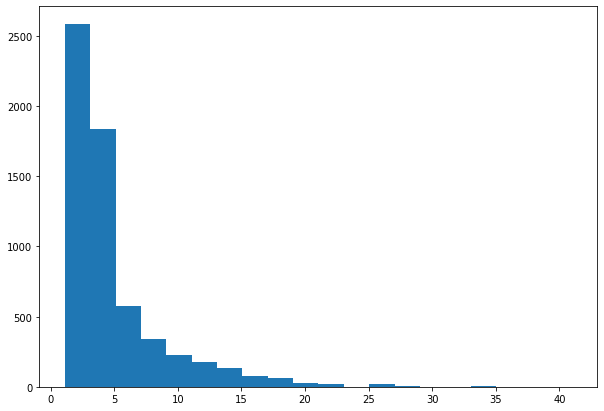

In [ ]:
plt.figure(figsize=(10, 7))
x = df['B365A']
plt.hist(x, bins=20)
plt.show()

In [ ]:
# lets create a df of home goal and away goal for each team
home = df[['HomeTeam','FTHG']] 
away = df[['AwayTeam','FTAG']]

home_tot = home.groupby('HomeTeam')['FTHG'].sum()
away_tot = away.groupby('AwayTeam')['FTAG'].sum()

In [ ]:
home_goal = pd.DataFrame(home_tot).reset_index()
away_goal = pd.DataFrame(away_tot).reset_index()

In [ ]:
away_goal.head()

,AwayTeam,FTAG
0,Arsenal,484.0
1,Aston Villa,283.0
2,Birmingham,62.0
3,Blackburn,142.0
4,Blackpool,25.0


In [ ]:
home_goal = home_goal.rename(columns={'FTHG': 'GSAH'}) # rename column as total_goal_as_home
home_goal.head()

,HomeTeam,GSAH
0,Arsenal,629.0
1,Aston Villa,304.0
2,Birmingham,87.0
3,Blackburn,186.0
4,Blackpool,30.0


In [ ]:
away_goal = away_goal.rename(columns={'FTAG': 'GSAA'}) # rename column as total_goal_as_away
away_goal.head()

,AwayTeam,GSAA
0,Arsenal,484.0
1,Aston Villa,283.0
2,Birmingham,62.0
3,Blackburn,142.0
4,Blackpool,25.0


In [ ]:
goal = pd.concat([home_goal, away_goal], axis=1)
goal = goal.drop(columns='AwayTeam') # drop one column of team name 
goal = goal.rename(columns={'HomeTeam':'Team'})

In [ ]:
goal.head()

,Team,GSAH,GSAA
0,Arsenal,629.0,484.0
1,Aston Villa,304.0,283.0
2,Birmingham,87.0,62.0
3,Blackburn,186.0,142.0
4,Blackpool,30.0,25.0


In [ ]:
total_goal = [ row.GSAH + row.GSAA for index, row in goal.iterrows() ]
goal['Total_goal_sco'] = total_goal 

In [ ]:
# 3 features were created here total goal as home team, total goal as away team and total goal
goal.head(5)

,Team,GSAH,GSAA,Total_goal_sco
0,Arsenal,629.0,484.0,1113.0
1,Aston Villa,304.0,283.0,587.0
2,Birmingham,87.0,62.0,149.0
3,Blackburn,186.0,142.0,328.0
4,Blackpool,30.0,25.0,55.0


In [ ]:
# lets create a score for each team based on the total goal it scored

In [ ]:
goal['Total_goal_sco'].describe() # lets check the team with the highst goal and the team with the lowest goal

count      40.000000
mean      408.225000
std       352.718489
min        20.000000
25%       148.750000
50%       309.500000
75%       484.250000
max      1189.000000
Name: Total_goal_sco, dtype: float64

In [ ]:
goal[goal['Total_goal_sco'] == 1189.0] # the team with the highest goal

,Team,GSAH,GSAA,Total_goal_sco
21,Man City,684.0,505.0,1189.0


In [ ]:
goal[goal['Total_goal_sco'] == 20.0] # the team with the lowest goal

,Team,GSAH,GSAA,Total_goal_sco
13,Derby,12.0,8.0,20.0


<Figure size 720x504 with 0 Axes>

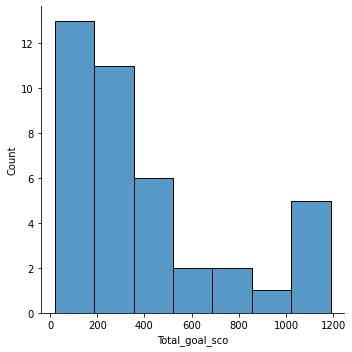

In [ ]:
plt.figure(figsize=(10, 7))
sns.displot(goal, x="Total_goal_sco") # Check the distrbution of the new created feature

In [ ]:
# now lets create one more feature goal_conceded_asHome , goal_conceded_asAway, total_goal_conceded, Net_goal

In [ ]:
goal_con_asHome = df[['HomeTeam','FTAG']] 
goal_con_asAway = df[['AwayTeam','FTHG']]

goal_con_asHome_tot = goal_con_asHome.groupby('HomeTeam')['FTAG'].sum()
goal_con_asAway_tot = goal_con_asAway.groupby('AwayTeam')['FTHG'].sum()

In [ ]:
GCAH = pd.DataFrame(goal_con_asHome_tot).reset_index() # goal conceded as home
GCAA = pd.DataFrame(goal_con_asAway_tot).reset_index() # goal conceded as away

In [ ]:
goal_con = pd.concat([GCAH, GCAA], axis=1)
goal_con = goal_con.drop(columns='AwayTeam') # drop one column of team name 
goal_con = goal_con.rename(columns={'HomeTeam':'Team'})
goal_con = goal_con.rename(columns={'FTAG':'GCAH','FTHG':'GCAA'})

In [ ]:
total_goal_con = [ row.GCAH + row.GCAA for index, row in goal_con.iterrows() ]
goal_con['Total_goal_con'] = total_goal_con # total goal conceded

In [ ]:
goal_con.head()

,Team,GCAH,GCAA,Total_goal_con
0,Arsenal,259.0,391.0,650.0
1,Aston Villa,311.0,411.0,722.0
2,Birmingham,78.0,139.0,217.0
3,Blackburn,151.0,245.0,396.0
4,Blackpool,37.0,41.0,78.0


In [ ]:
# create a big df fro goal scored and goal conceded
goal_df = pd.concat([goal, goal_con], axis=1)


In [ ]:
goal_df = goal_df.T.drop_duplicates().T
goal_df.head()

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0
2,Birmingham,87.0,62.0,149.0,78.0,139.0,217.0
3,Blackburn,186.0,142.0,328.0,151.0,245.0,396.0
4,Blackpool,30.0,25.0,55.0,37.0,41.0,78.0


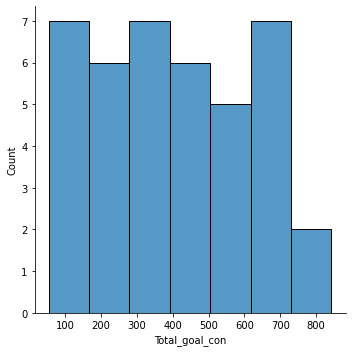

In [ ]:
sns.displot(goal_df, x="Total_goal_con") # check the distrbution of another new created feature

In [ ]:
net_goal = [ row.Total_goal_sco - row.Total_goal_con for index, row in goal_df.iterrows() ]
goal_df['Net_goal'] = net_goal # find the net goal teams scored 

In [ ]:
goal_df.head()

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0,-135.0
2,Birmingham,87.0,62.0,149.0,78.0,139.0,217.0,-68.0
3,Blackburn,186.0,142.0,328.0,151.0,245.0,396.0,-68.0
4,Blackpool,30.0,25.0,55.0,37.0,41.0,78.0,-23.0


In [ ]:
sorted_teams = goal_df[['Team','Net_goal']].sort_values(by='Net_goal', ascending=False).head(15)
sorted_teams = sorted_teams.set_index('Team')

In [ ]:
fig = px.bar(sorted_teams, x =sorted_teams.index, y= sorted_teams['Net_goal'])
fig.show() # Plot to see how the features we create classify teams

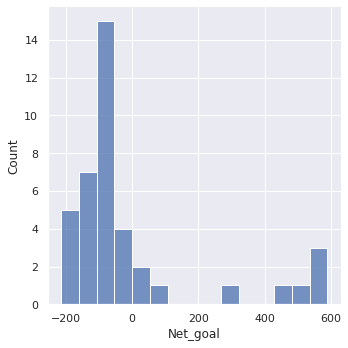

In [ ]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.displot(goal_df, x="Net_goal") # check the distrbution of the new feature 

In [ ]:
# we have created features related to goal now lets go back to our oridinal df
df.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.0,4.33,1.53,A
1,2020-12-09,Crystal Palace,Southampton,1.0,0.0,3.1,3.25,2.37,H


In [ ]:
# lets try to create a feature about last matchs of the team
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.00,4.33,1.53,A
1,2020-12-09,Crystal Palace,Southampton,1.0,0.0,3.10,3.25,2.37,H
2,2020-12-09,Liverpool,Leeds,4.0,3.0,1.28,6.00,9.50,H
3,2020-12-09,West Ham,Newcastle,0.0,2.0,2.15,3.40,3.40,A
4,2020-09-13,West Brom,Leicester,0.0,3.0,3.80,3.60,1.95,A


In [ ]:
home_res = df[['HomeTeam','FTR','Date']] 
away_res = df[['AwayTeam','FTR','Date']]

In [ ]:
draw_res = home_res[home_res['FTR'] == 'D']

In [ ]:
home_res = home_res[home_res['FTR'] == 'H']
away_res = away_res[away_res['FTR'] == 'A']


In [ ]:
home_res.head(2)

,HomeTeam,FTR,Date
1,Crystal Palace,H,2020-12-09
2,Liverpool,H,2020-12-09


In [ ]:
home_count = home_res.groupby(home_res['Date'].dt.year)['FTR'].count()
away_count = away_res.groupby(away_res['Date'].dt.year)['FTR'].count()
draw_count = draw_res.groupby(draw_res['Date'].dt.year)['FTR'].count()

In [ ]:
count = pd.concat([home_count, draw_count, away_count], axis=1)

In [ ]:
count.columns=['home', 'draw', 'away']

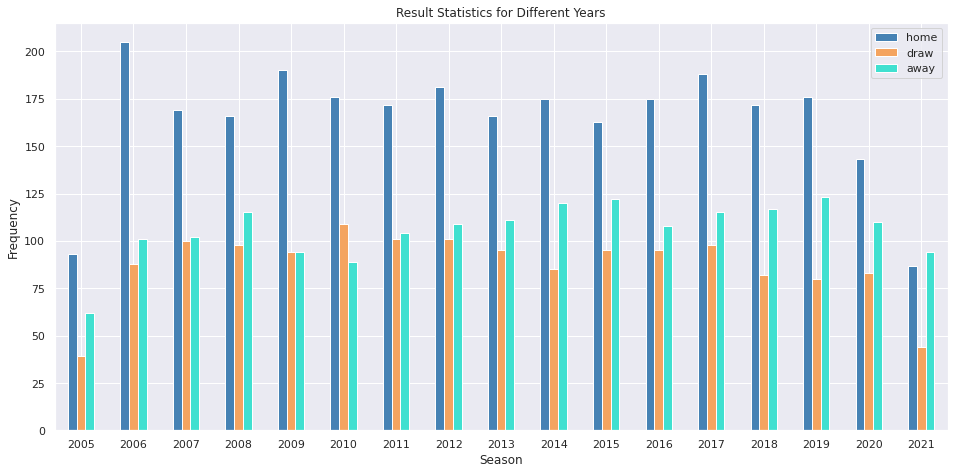

In [ ]:
ax = count.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5], 
                       title='Result Statistics for Different Years')
plt.xticks(rotation=0)
ax.set_ylabel('Frequency', size=12)
ax.set_xlabel('Season', size=12)
plt.show()

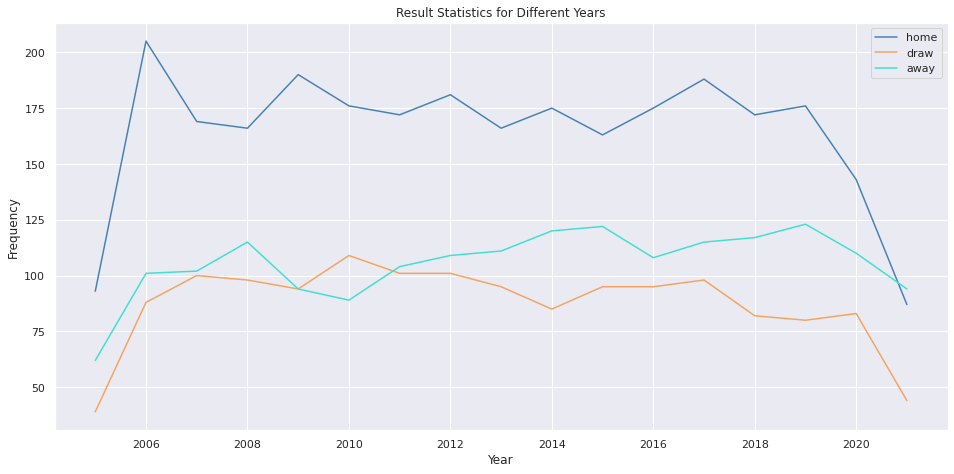

In [ ]:
ax = count.plot(kind='line', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5], 
                       title='Result Statistics for Different Years')
plt.xticks(rotation=0)
ax.set_ylabel('Frequency', size=12)
ax.set_xlabel('Year', size=12)
plt.show()

In [ ]:
# we have two dataframes so far the goal dataframe and the main matchs data frame lets look at them

In [ ]:
df.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.0,4.33,1.53,A
1,2020-12-09,Crystal Palace,Southampton,1.0,0.0,3.1,3.25,2.37,H


In [ ]:
goal_df.head(2)

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0,-135.0


In [ ]:
# one main feature is rank of the team based on diffrent characters
#lets rank the teams based on Net goal the have 

In [ ]:
goal_df['Netgoal_Rank'] = goal_df["Net_goal"].rank(ascending=False) # Net goal rank (the more the stronger)
goal_df['GoalScored_Rank'] = goal_df["Total_goal_sco"].rank(ascending=False) #total goal scored 
goal_df['GoalCon_Rank'] = goal_df["Total_goal_con"].rank(ascending=True) # total goal consided rank (the less the stronger)

In [ ]:
goal_df.head()

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal,Netgoal_Rank,GoalScored_Rank,GoalCon_Rank
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,35.0
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0,-135.0,32.0,10.0,37.0
2,Birmingham,87.0,62.0,149.0,78.0,139.0,217.0,-68.0,17.5,30.0,11.0
3,Blackburn,186.0,142.0,328.0,151.0,245.0,396.0,-68.0,17.5,18.0,21.0
4,Blackpool,30.0,25.0,55.0,37.0,41.0,78.0,-23.0,10.0,38.0,2.0


In [ ]:
strong_teams = goal_df.sort_values(['Netgoal_Rank', 'GoalScored_Rank','GoalCon_Rank'])
strong_teams.head()

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal,Netgoal_Rank,GoalScored_Rank,GoalCon_Rank
22,Man United,643.0,500.0,1143.0,238.0,316.0,554.0,589.0,1.0,2.0,28.0
21,Man City,684.0,505.0,1189.0,254.0,354.0,608.0,581.0,2.0,1.0,31.0
11,Chelsea,638.0,483.0,1121.0,241.0,317.0,558.0,563.0,3.0,3.0,29.0
20,Liverpool,634.0,482.0,1116.0,236.0,358.0,594.0,522.0,4.0,4.0,30.0
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,35.0


In [ ]:
# Since there are teams that played only few games Goal conceded rank is not a good feature
# we will drop goal conceded rank column

In [ ]:
goal_df = goal_df.drop(columns='GoalCon_Rank')

In [ ]:
df.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.0,4.33,1.53,A
1,2020-12-09,Crystal Palace,Southampton,1.0,0.0,3.1,3.25,2.37,H


In [ ]:
def home_points(row):
  """Get the Points Scored by The Home Team"""
  if row['FTHG'] > row['FTAG']:
    return 3
  elif row['FTHG'] < row['FTAG']:
    return 0
  else:
    return 1

def away_points(row):
  """Get the Points Scored by The Away Team"""
  if row['FTHG'] < row['FTAG']:
      return 3
  elif row['FTHG'] > row['FTAG']:
      return 0
  else:
      return 1

In [ ]:
df['HT_point'] = df.apply(lambda row: home_points(row), axis=1)
df['AT_point'] = df.apply(lambda row: away_points(row), axis=1)

In [ ]:
df.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR,HT_point,AT_point
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.00,4.33,1.53,A,0,3
1,2020-12-09,Crystal Palace,Southampton,1.0,0.0,3.10,3.25,2.37,H,3,0
2,2020-12-09,Liverpool,Leeds,4.0,3.0,1.28,6.00,9.50,H,3,0
3,2020-12-09,West Ham,Newcastle,0.0,2.0,2.15,3.40,3.40,A,0,3
4,2020-09-13,West Brom,Leicester,0.0,3.0,3.80,3.60,1.95,A,0,3


In [ ]:
goal_df.head(2) # lets add points to our goal table

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal,Netgoal_Rank,GoalScored_Rank
0,Aachen,28.0,18.0,46.0,37.0,33.0,70.0,-24.0,57.5,181.0
1,Ajaccio,113.0,95.0,208.0,127.0,202.0,329.0,-121.0,162.0,132.5


In [ ]:
home_points = df.groupby('HomeTeam')['HT_point'].sum().reset_index()
away_points = df.groupby('AwayTeam')['AT_point'].sum().reset_index()

In [ ]:
goal_df = pd.concat([goal_df, home_points,away_points,],axis=1) # add it goal dataframe
goal_df = goal_df.drop(columns=['HomeTeam','AwayTeam']) # lets drop the haome and away team names 

In [ ]:
goal_df.head()

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal,Netgoal_Rank,GoalScored_Rank,HT_point,AT_point
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0,-135.0,32.0,10.0,320,268
2,Birmingham,87.0,62.0,149.0,78.0,139.0,217.0,-68.0,17.5,30.0,108,50
3,Blackburn,186.0,142.0,328.0,151.0,245.0,396.0,-68.0,17.5,18.0,211,127
4,Blackpool,30.0,25.0,55.0,37.0,41.0,78.0,-23.0,10.0,38.0,20,19


In [ ]:
#lets rank the teams based on the points they collected in the years it can be a good feature to use 
net_goal = [ row.HT_point + row.AT_point for index, row in goal_df.iterrows() ]
goal_df['TOT_points'] = net_goal # find the total points by the teams

In [ ]:
goal_df.head()

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal,Netgoal_Rank,GoalScored_Rank,HT_point,AT_point,TOT_points
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0,-135.0,32.0,10.0,320,268,588
2,Birmingham,87.0,62.0,149.0,78.0,139.0,217.0,-68.0,17.5,30.0,108,50,158
3,Blackburn,186.0,142.0,328.0,151.0,245.0,396.0,-68.0,17.5,18.0,211,127,338
4,Blackpool,30.0,25.0,55.0,37.0,41.0,78.0,-23.0,10.0,38.0,20,19,39


In [ ]:
# lets rank the teams based on the points they collect over the years
goal_df['Points_Rank'] = goal_df["TOT_points"].rank(ascending=False)

In [ ]:
# lets see which teams have collected a lot of points 
big_15_points = goal_df.sort_values(by='Points_Rank').head(15)

In [ ]:
fig = px.bar(big_15_points, x =big_15_points['Team'], y= big_15_points['TOT_points'])
fig.show()

In [ ]:
df.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR,HT_point,AT_point
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.0,4.33,1.53,A,0,3
1,2020-12-09,Crystal Palace,Southampton,1.0,0.0,3.1,3.25,2.37,H,3,0


In [ ]:
goal_df.head(2)

,Team,GSAH,GSAA,Total_goal_sco,GCAH,GCAA,Total_goal_con,Net_goal,Netgoal_Rank,GoalScored_Rank,HT_point,AT_point,TOT_points,Points_Rank
0,Arsenal,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
1,Aston Villa,304.0,283.0,587.0,311.0,411.0,722.0,-135.0,32.0,10.0,320,268,588,10.0


In [ ]:
# lets Join our Goal_df features with our main data frame 
goal_df_home = goal_df.rename(columns={'Team':'HomeTeam'})
goal_df_home = goal_df_home.rename(columns={'GSAH':'GSAH(HT)',	'GSAA':'GSAA(HT)',	'Total_goal_sco':'TGS(HT)',	'GCAH':'GCAH(HT)',	'GCAA':'GCAA(HT)',	'Total_goal_con':'TGC(HT)',	'Net_goal':'NG(HT)',	'Netgoal_Rank':'NGR(HT)',	'GoalScored_Rank':'GSR(HT)',	'HT_point':'HP(HT)',	'AT_point':'AP(HT)',	'TOT_points':'TP(HT)',	'Points_Rank':'PR(HT)'})

In [ ]:
goal_df_away = goal_df.rename(columns={'Team':'AwayTeam'})
goal_df_away = goal_df_away.rename(columns={'GSAH':'GSAH(AT)',	'GSAA':'GSAA(AT)',	'Total_goal_sco':'TGS(AT)',	'GCAH':'GCAH(AT)',	'GCAA':'GCAA(AT)',	'Total_goal_con':'TGC(AT)',	'Net_goal':'NG(AT)',	'Netgoal_Rank':'NGR(AT)',	'GoalScored_Rank':'GSR(AT)',	'HT_point':'HP(AT)',	'AT_point':'AP(AT)',	'TOT_points':'TP(AT)',	'Points_Rank':'PR(AT)'})

In [ ]:
df_1 = pd.merge(df, goal_df_home, on="HomeTeam")

In [ ]:
df_fin = pd.merge(df_1, goal_df_away, on="AwayTeam")

In [ ]:
df_fin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,FTR,HT_point,AT_point,GSAH(HT),GSAA(HT),TGS(HT),GCAH(HT),GCAA(HT),TGC(HT),NG(HT),NGR(HT),GSR(HT),HP(HT),AP(HT),TP(HT),PR(HT),GSAH(AT),GSAA(AT),TGS(AT),GCAH(AT),GCAA(AT),TGC(AT),NG(AT),NGR(AT),GSR(AT),HP(AT),AP(AT),TP(AT),PR(AT)
0,2020-12-09,Fulham,Arsenal,0.0,3.0,6.00,4.33,1.53,A,0,3,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
1,2018-07-10,Fulham,Arsenal,1.0,5.0,5.25,4.33,1.66,A,0,3,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
2,2013-08-24,Fulham,Arsenal,1.0,3.0,3.80,3.50,2.10,A,0,3,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
3,2013-04-20,Fulham,Arsenal,0.0,1.0,5.00,4.00,1.75,A,0,3,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
4,2012-02-01,Fulham,Arsenal,2.0,1.0,4.00,3.50,1.91,H,3,0,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0


In [ ]:
df_first_features = df_fin.drop(columns=['FTHG','FTAG','HT_point','AT_point'])

In [ ]:
df_first_features.head()

,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,FTR,GSAH(HT),GSAA(HT),TGS(HT),GCAH(HT),GCAA(HT),TGC(HT),NG(HT),NGR(HT),GSR(HT),HP(HT),AP(HT),TP(HT),PR(HT),GSAH(AT),GSAA(AT),TGS(AT),GCAH(AT),GCAA(AT),TGC(AT),NG(AT),NGR(AT),GSR(AT),HP(AT),AP(AT),TP(AT),PR(AT)
0,2020-12-09,Fulham,Arsenal,6.00,4.33,1.53,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
1,2018-07-10,Fulham,Arsenal,5.25,4.33,1.66,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
2,2013-08-24,Fulham,Arsenal,3.80,3.50,2.10,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
3,2013-04-20,Fulham,Arsenal,5.00,4.00,1.75,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0
4,2012-02-01,Fulham,Arsenal,4.00,3.50,1.91,H,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0


In [ ]:
df_first_features['weekday'] = df_first_features['Date'].dt.weekday

In [ ]:
df_first_features['month'] = pd.DatetimeIndex(df_first_features['Date']).month

In [ ]:
df_first_features.head()

,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,FTR,GSAH(HT),GSAA(HT),TGS(HT),GCAH(HT),GCAA(HT),TGC(HT),NG(HT),NGR(HT),GSR(HT),HP(HT),AP(HT),TP(HT),PR(HT),GSAH(AT),GSAA(AT),TGS(AT),GCAH(AT),GCAA(AT),TGC(AT),NG(AT),NGR(AT),GSR(AT),HP(AT),AP(AT),TP(AT),PR(AT),month,weekday
0,2020-12-09,Fulham,Arsenal,6.00,4.33,1.53,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0,12,2
1,2018-07-10,Fulham,Arsenal,5.25,4.33,1.66,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0,7,1
2,2013-08-24,Fulham,Arsenal,3.80,3.50,2.10,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0,8,5
3,2013-04-20,Fulham,Arsenal,5.00,4.00,1.75,A,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0,4,5
4,2012-02-01,Fulham,Arsenal,4.00,3.50,1.91,H,275.0,175.0,450.0,282.0,349.0,631.0,-181.0,38.0,11.0,300,152,452,12.0,629.0,484.0,1113.0,259.0,391.0,650.0,463.0,5.0,5.0,660,466,1126,5.0,2,2


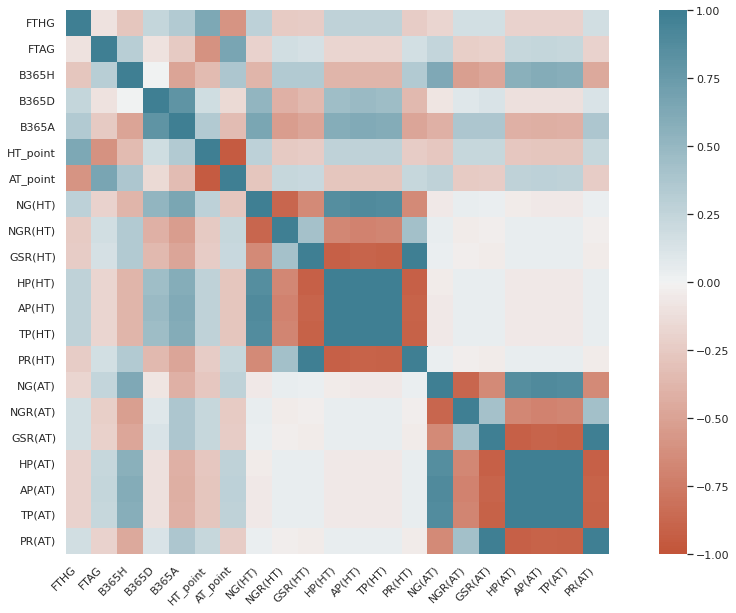

In [ ]:
# lets check the corelation of features in the 
sns.set(rc = {'figure.figsize':(18,10)})
corr = df_fin.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# lets see how rank featurs are corelated
Ranks = df_first_features[['B365H',	'B365D','B365A','NGR(HT)','GSR(HT)','NGR(AT)','GSR(AT)']]

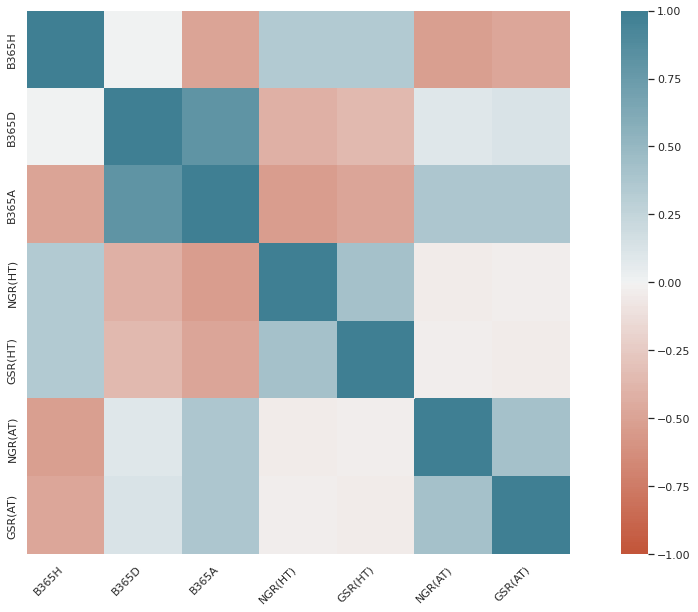

In [ ]:
# lets check the corelation of features in the 
sns.set(rc = {'figure.figsize':(18,10)})
corr = Ranks.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
# save the final features 
df_first_features.to_csv('Historic_fea.csv')